# Understanding Descriptive Statistics

Import the necessary libraries here:

In [5]:
# Libraries
import pandas as pd
import numpy as np
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [6]:
# your code here

# Function that stimulates rolling a dice 10 times:
def dice(i):
    list1 = list(range(1,7))
    dice = [random.choice(list1) for i in range(i)] 
    return dice 

print(dice(10))


[4, 1, 4, 5, 3, 2, 1, 3, 2, 5]


In [7]:
df= pd.DataFrame(dice(10))
df.columns = ['outcome']
#df = df.set_index("rolls")
df.index += 1 
df

,outcome
1,2
2,6
3,2
4,6
5,4
6,5
7,6
8,3
9,6
10,2


#### 2.- Plot the results sorted by value.

In [8]:
# your code here
df_2 = df.sort_values('outcome', ascending=False)
df_2

,outcome
2,6
4,6
7,6
9,6
6,5
5,4
8,3
1,2
3,2
10,2


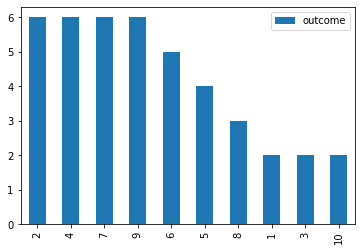

In [10]:
df_2.plot.bar()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [11]:
# your code here
# Calculating the frequency distribution:

df_3 = df_2.groupby(["outcome"]).size().reset_index()
df_3.columns = ['outcome','Frequency']
df_3

,outcome,Frequency
0,2,3
1,3,1
2,4,1
3,5,1
4,6,4


In [12]:
# Setting the index to outcome
df_4 = df_3.set_index("outcome")
df_4

,Frequency
outcome,
2,3
3,1
4,1
5,1
6,4


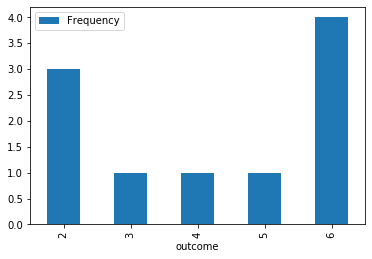

In [13]:
# Plotting the frequency distribution
df_4.plot.bar()

In [14]:
"""
your comments here:

This plot is now showing the frequency correctly for every number.
When the index hadn´t been set correctly, the plot was only showing the outcome per throw.

"""

'\nyour comments here:\n\nThis plot is now showing the frequency correctly for every number.\nWhen the index hadn´t been set correctly, the plot was only showing the outcome per throw.\n\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [15]:
df_5 = df_4.reset_index()
df_5

,outcome,Frequency
0,2,3
1,3,1
2,4,1
3,5,1
4,6,4


In [16]:
# Applying the outcome * Frequency on every row:
outcome_freq = df_5.apply(lambda x: x[0] * x[1], axis=1)
outcome_freq

0     6
1     3
2     4
3     5
4    24
dtype: int64

In [17]:
# your code here
# Writing a function to calculate the mean of the dataframe:

def mean(df):
    total_freq = df['Frequency'].sum()
    outcome_freq = df_5.apply(lambda x: x[0] * x[1], axis=1)
    sum_1 = outcome_freq.sum()
    return sum_1/total_freq
    
print(mean(df_5))

4.2


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [18]:
# your code here
# Calculating the frequency distribution:
df_4.head()

# Resetting the index, because the outcome column gives an error
df_5 = df_4.reset_index()
df_5

# Mean = Sum(Outcome * Frequency) / Sum(Frequency)
# Applying it to the dataframe:

df_5["multiply"] = df_5["outcome"] * df_5["Frequency"]

df_5["mean"] = df_5["multiply"].sum()/df_5["Frequency"].sum()
df_5


,outcome,Frequency,multiply,mean
0,2,3,6,4.2
1,3,1,3,4.2
2,4,1,4,4.2
3,5,1,5,4.2
4,6,4,24,4.2


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [25]:
# I didn´t know how to apply this function on a dataframe. Below are some scraps that I made (please disregard).

# Median is the middle value
# sum(frequency)/2
# if even: median is outcome freq + outcome freq+1
# if uneven: median is outcome freq

#middle_freq = (df_5['Frequency'].sum())/2
#print(middle_freq)

#if df['Frequency'].sum() %2 == 0:
#outcome = df_5["outcome"] 
#+ df_5["outcome"][middle_freq+1]
#print(outcome)

#b = [i for i in df_5["outcome"] if (df_5["Frequency"].sum() == 5)]
#print(b)


[]


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [ ]:
# your code here
# I didn´t know how to apply this function on a dataframe.

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [27]:
# your code here
# Importing data
dice = pd.read_csv('../data/roll_the_dice_hundred.csv')

dice.head()

# Unnamed and roll are the same, so dropping unnamed.

dice_clean = dice.drop(["Unnamed: 0"], axis = 1)
dice_clean

,roll,value
0,0,1
1,1,2
2,2,6
3,3,1
4,4,6
...,...,...
95,95,4
96,96,6
97,97,1
98,98,3


In [28]:
# Sorting the values
dice_sorted = dice_clean.sort_values('value', ascending=False)
dice_sorted

,roll,value
99,99,6
36,36,6
23,23,6
24,24,6
90,90,6
...,...,...
89,89,1
47,47,1
73,73,1
56,56,1


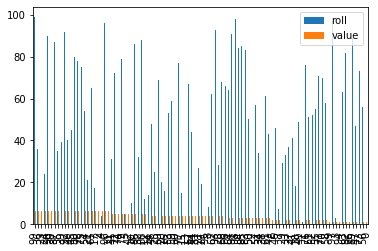

In [29]:
# Plotting the items
dice_sorted.plot.bar()

In [ ]:
"""
your comments here
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [36]:
# your code here
# Calculating the frequency distribution:
dice_freq = dice_sorted.groupby(["value"]).size().reset_index()
dice_freq.columns = ['value','Frequency']
dice_freq


,value,Frequency
0,1,12
1,2,17
2,3,14
3,4,22
4,5,12
5,6,23


In [37]:
# Function to calculate the mean:
def mean(df):
    total_freq = df['Frequency'].sum()
    outcome_freq = df.apply(lambda x: x[0] * x[1], axis=1)
    sum_1 = outcome_freq.sum()
    return sum_1/total_freq

# Applying the function to the df:    
print(mean(dice_freq))

3.74


#### 3.- Now, calculate the frequency distribution.


In [31]:
# your code here
# Calculating the frequency distribution:
dice_freq = dice_sorted.groupby(["value"]).size().reset_index()
dice_freq.columns = ['value','Frequency']
dice_freq

,value,Frequency
0,1,12
1,2,17
2,3,14
3,4,22
4,5,12
5,6,23


In [40]:
# Setting the index to value
dice_freq = dice_freq.set_index("value")
dice_freq

,Frequency
value,
1,12
2,17
3,14
4,22
5,12
6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

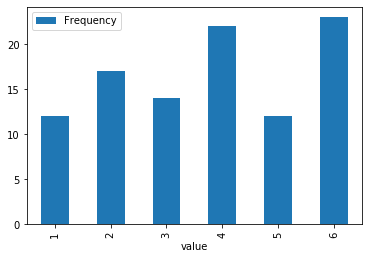

In [41]:
# your code here
# Plotting the frequency distribution:
dice_freq.plot.bar()

In [ ]:
"""
your comments here:
The shape looks almost trimodal (since there are 3 peaks).
When looking at the surface underneath the histogram, the value of the mean looks indeed to be exactly the middle.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [43]:
# your code here
dice_thousand = pd.read_csv('../data/roll_the_dice_thousand.csv')

dice_thousand.head()

# Unnamed and roll are the same, so dropping unnamed.

dice_th_clean = dice_thousand.drop(["Unnamed: 0"], axis = 1)
dice_th_clean

,roll,value
0,0,5
1,1,6
2,2,1
3,3,6
4,4,5
...,...,...
995,995,1
996,996,4
997,997,4
998,998,3


In [45]:
# Calculating the frequency distribution:
dice_th_freq = dice_thousand.groupby(["value"]).size().reset_index()
dice_th_freq.columns = ['value','Frequency']
dice_th_freq

# Setting the index to value
dice_th_freq = dice_th_freq.set_index("value")
dice_th_freq

,Frequency
value,
1,175
2,167
3,175
4,168
5,149
6,166


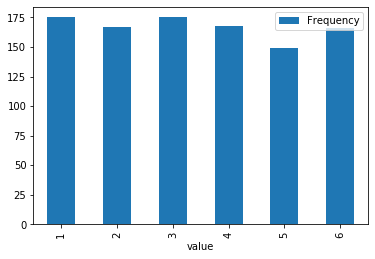

In [46]:
# Plotting the frequency distribution:
dice_th_freq.plot.bar()

In [ ]:
"""
your comments here:
All items now seem much more equally distributed.
This means that the mean will now be more towards the middle value (=3)
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

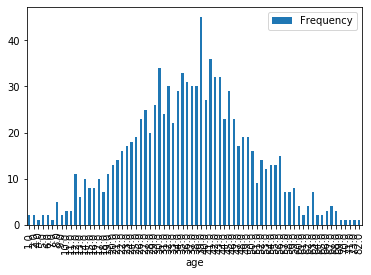

In [64]:
# your code here
# Importing data
ages_pop = pd.read_csv('../data/ages_population.csv')
ages_pop.head()

# Calculate frequency distribution
ages_freq = ages_pop.groupby(["observation"]).size().reset_index()
ages_freq.columns = ['age','Frequency']
ages_freq

# Setting the index to value
ages_freq = ages_freq.set_index("age")
ages_freq

# Plotting the frequency distribution:
ages_freq.plot.bar()

# The mean seems to be in the middle

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [68]:
# Resetting the index 
ages_freq = ages_pop.groupby(["observation"]).size().reset_index()
ages_freq.columns = ['age','Frequency']
ages_freq

,age,Frequency
0,1.0,2
1,2.0,2
2,4.0,1
3,5.0,2
4,6.0,2
...,...,...
67,69.0,1
68,70.0,1
69,71.0,1
70,73.0,1


In [69]:
# your code here
## Find mean
ages_freq["age"].mean()

37.611111111111114

In [70]:
## Find standard deviation
ages_freq["age"].std()

21.239450110621153

In [ ]:
"""
your comments here
The mean and std fall indeed in the range I expected.
I thought the mean to be around 35 and the std around 20, since the histogram is quite spread.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

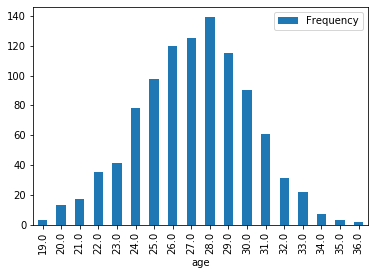

In [59]:
# your code here
# Importing data
ages_pop_2 = pd.read_csv('../data/ages_population2.csv')
ages_pop_2.head()

# Calculate frequency distribution
ages_freq_2 = ages_pop_2.groupby(["observation"]).size().reset_index()
ages_freq_2.columns = ['age','Frequency']
ages_freq_2

# Setting the index to value
ages_freq_2 = ages_freq_2.set_index("age")
ages_freq_2

# Plotting the frequency distribution:
ages_freq_2.plot.bar()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
The frequency is less spread and has an overall more bellshape form.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [71]:
# your code here

# Calculate frequency distribution
ages_freq_2 = ages_pop_2.groupby(["observation"]).size().reset_index()
ages_freq_2.columns = ['age','Frequency']
ages_freq_2

## Find mean
ages_freq_2["age"].mean()

27.5

In [72]:
## Find standard deviation
ages_freq_2["age"].std()

5.338539126015656

In [ ]:
"""
your comments here
The mean is a bit lower than the one of population 1, but in the diagram the mean can be clearly seen in the middle.
The standard deviation shows, that the age of the population is less spread.

"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

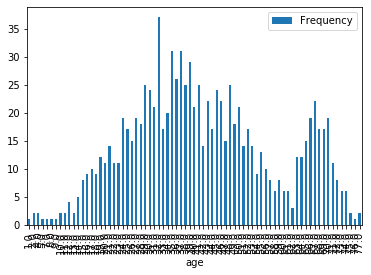

In [60]:
# your code here
# Importing data
ages_pop_3 = pd.read_csv('../data/ages_population3.csv')
ages_pop_3.head()

# Calculate frequency distribution
ages_freq_3 = ages_pop_3.groupby(["observation"]).size().reset_index()
ages_freq_3.columns = ['age','Frequency']
ages_freq_3

# Setting the index to value
ages_freq_3 = ages_freq_3.set_index("age")
ages_freq_3

# Plotting the frequency distribution:
ages_freq_3.plot.bar()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [73]:
# your code here
ages_freq_3 = ages_pop_3.groupby(["observation"]).size().reset_index()
ages_freq_3.columns = ['age','Frequency']
ages_freq_3

## Find mean
ages_freq_3["age"].mean()

39.92

In [74]:
## Find standard deviation
ages_freq_3["age"].std()

21.930331950507714

In [ ]:
"""
your comments here
The mean seems to be a bit more to the right (higher age) due to the peak on the right side.
This has also caused the standard deviation to go up again.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [75]:
# your code here
# First Quantile
ages_freq_3.quantile(0.25)

age          21.5
Frequency     6.0
Name: 0.25, dtype: float64

In [76]:
# Second Quantile
ages_freq_3.quantile(0.50)

age          40.0
Frequency    13.0
Name: 0.5, dtype: float64

In [77]:
# Third Quantile
ages_freq_3.quantile(0.75)

age          58.5
Frequency    19.0
Name: 0.75, dtype: float64

In [78]:
# Fourth Quantile
ages_freq_3.quantile(1.00)

age          77.0
Frequency    37.0
Name: 1.0, dtype: float64

In [80]:
## Find standard deviation
ages_freq_3["age"].median()

40.0

In [ ]:
"""
your comments here
The median and the mean are very close to eachother.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [81]:
# your code here
# 68 percent:
ages_freq_3.quantile(0.68)

age          53.32
Frequency    17.32
Name: 0.68, dtype: float64

In [82]:
# 95 percent:
ages_freq_3.quantile(0.95)

age          73.3
Frequency    26.9
Name: 0.95, dtype: float64

In [83]:
# 99 percent:
ages_freq_3.quantile(0.99)

age          76.26
Frequency    32.56
Name: 0.99, dtype: float64

In [ ]:
"""
your comments here
It can indeed be seen that the ditribution is quite spread and that the standard deviation is higher.
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""